# 1.Obtain

In [129]:
from sklearn import datasets
import numpy as np
import pandas as pd
import sklearn

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
type(diabetes)

sklearn.utils._bunch.Bunch

> - Sklearn tiene su propio tipo de dato que recibe el nombre de bunch. Se trata de un archivo con estructura de tipo .json

In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

> - Los feature variables suelen recibir el nombre de X (mayusc)
> - La target variable suele recibir el nombre de y (minusc)

In [ ]:
X = diabetes.data

In [ ]:
X.shape

(442, 10)

In [ ]:
y = diabetes.target

In [ ]:
y.shape

(442,)

> - `np.c_[array1, array2,...]` es una función de Numpy usada para concatenar arrays

In [ ]:
data = np.c_[X, y]

In [ ]:
df = pd.DataFrame(data, columns = diabetes.feature_names + ["target"])

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Otra forma de hacerlo mucho más rápido

In [ ]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y = True)

df_X, df_y = datasets.load_diabetes(return_X_y = True, as_frame = True)

df = pd.concat([df_X, df_y], axis = 1)

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# 2.Scrub

## 2.1.1 Limpieza de datos

> - **Elimar datos irrelevantes** con el método de pandas `df.drop("columna2, axis=1)`
> - **Eliminar datos duplicados** teniendo en cuenta que hay que corroborar si son 100% duplicaods con el método `df.drop.duplicates(subset, inplace)`
> - Solucionar **errores estructurales**. Usando métodos como el `df["columna"].unique()` o `df["columna"].str.replace(a, b)`
> - **Eliminar** los **outliers**. Calculamos Q1, Q2, Q3 y el IQR (rango intercuartil). En un proyecto de machine learning eliminar estos outliers es muy importante. Eliminando estos outliers conseguimos un modelo más **robusto**
> - **Lidiar con NaN**. En algoritmos de machine learning es muy importante que retiremos todos estos valores o inputemos valores que sean validos (por ejemplo sustituir el valor NaN por cero, por la media o la mediana, ...). Podemos usar otro algoritmo de machine learning dentro del actual para sustituir esos valores Nan por valores que sean más correctos, es decir, usar machine learning para predecir los valores que faltan dentro de un dataset.

## 2.1.2 Manipulación de datos

### Codificar las variables categóricas

> - Se basa en transformar nuestros datos para que nuestros modelos puedan trabajar comodamente
> - En este apartado nos vamos a centrar exclusivamente en modelos de linear regression
> - Sabemos que nuestro target variable tiene que ser una variable continua, pero, ¿qué pasa si nuestras feature variables no son continuas? por ejemplo, si fuesen variables categóricas. En este caso, para los modelos de linear regresion, **todas las variables tienen que ser varibales numéricas** (continuas)
> - Tenemos por tanto que buscar una forma de transformar las variables categóricas a valores numéricos. Es lo que se llama **encoding** (codificación de datos sin que pierdan significado o valor)
> - La librería sklearn cuenta con un módulo que contiene herramientas de preprocesado para transformar nuestros datos. Una de esas herramientas es el `LabelEncoder` que permite transformar las variables categóricas en numéricas. Existen muchos más encoders, este es solamente uno de ellos y es el que usaremos para realizar estos modelos de linear regresion
> - Los pasos que seguimos para utilizar las herramientas de preprocesado son:
>> 1. Create: construimos una instancia del objeto importado
>> 2. Fit: "ajusta" los datos a la acción que realiza el objeto. Aprende cuales son las variables que tiene que modificar.
>> 3. Transform: el objeto aplicará los patrones que ha aprendido en nuevo set de datos. Realiza una asignación completamente aleatoria para no sesgar los datos de nuestro modelo por su orden.






In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data = ["paris", "paris", "tokyo", "amstedam"]

In [ ]:
le.fit(data)

LabelEncoder()

In [ ]:
le.transform(data)

array([1, 1, 2, 0])

In [ ]:
data2 = [ "amstedam", "paris", "paris", "tokyo", "paris", "amstedam"]

le.transform(data2)

array([0, 1, 1, 2, 1, 0])

### Escalar los datos

> - Es de vital importancia realizar un **escalado** de nuestras variables, es decir, asignar un peso/importancia a cada una de nuestras variables para ajustarlas de forma independiente al mismo rango.
> - Podemos utilizar por ejemplo el **StandarScaler** centra los valores a 0 con una STD de 1. De esta forma tenemos una manera de representar los datos de forma equitativa entre todas las demás variables y así el modelo no interpretará que unos datos son más importantes que otros.

In [ ]:
data = {"salario" : [2000, 12000, 8000, 6000, 5720],
        "edad" : [24, 73, 56, 17, 21],
        "altura" : [1.72, 1.95, 1.69, 1.63, 1.84]
        }

df = pd.DataFrame(data)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s_sc = StandardScaler()

In [ ]:
s_sc.fit(df)

StandardScaler()

In [ ]:
data = s_sc.transform(df)

In [ ]:
data

array([[-1.45285546, -0.63826833, -0.40123061],
       [ 1.60965604,  1.56420688,  1.60492243],
       [ 0.38465144,  0.80008283, -0.66290274],
       [-0.22785086, -0.95290764, -1.18624702],
       [-0.31360118, -0.77311375,  0.64545794]])

In [ ]:
df_scaled = pd.DataFrame(data)

<Axes: >

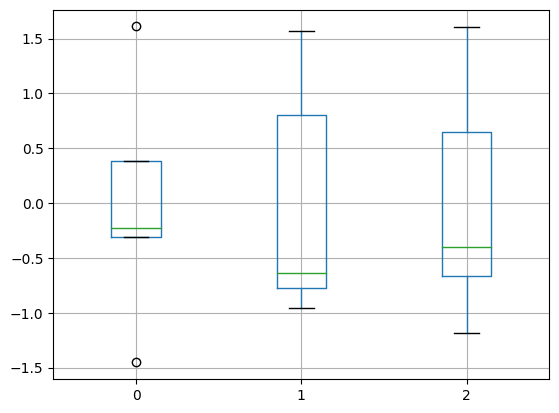

In [ ]:
df_scaled.boxplot()

<Axes: >

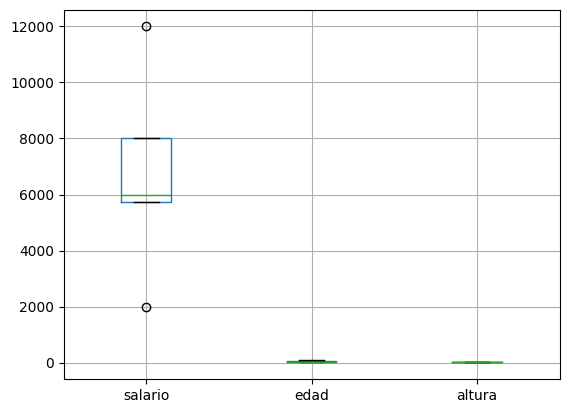

In [ ]:
df.boxplot()

# 3.Explore

> - Buscamos conseguir info para conocer que modelo de machine learning debemos utilizar, qué pasos debemos llevar a cabo en el preprocesado, qué errores puedo detectar, en definitiva ¿está todo ok para seguir con mi proyecto?
> - Dos formas de realizar esta exploración, mediante datos estadísticos a través de un aproach cuantitativo o mediante la realización de visualizaciones con un aproach visual.

## 3.1 Aproach cuantitativo

> - Muy importante realizar un análisis univariable de nuestros datos
> - Método de pandas `df.describe()` que devuelves datos estadísticos de nuestro dataframe

In [ ]:
df.describe()

,salario,edad,altura
count,5.00000,5.000000,5.00000
mean,6744.00000,38.200000,1.76600
std,3650.70952,24.873681,0.12818
min,2000.00000,17.000000,1.63000
25%,5720.00000,21.000000,1.69000
50%,6000.00000,24.000000,1.72000
75%,8000.00000,56.000000,1.84000
max,12000.00000,73.000000,1.95000


> - Otra forma podría ser la utilización de **test estadísticos** que son pruebas matemáticas que se aplican a las estadísticas para determinar su grado de certeza y su significado. También se les conoce como test de hipótesis.


## 3.2 Aproach cuantitativo

> - Nos permite conseguir información a través de la visualización de datos ayudando esta visualización a identificar la naturaleza de estos datos (detectar anomalias, outliers, relaciones entre datos...)

### 3.2.1 Scatter matrix

> - Visualización que muestra un grupo de Scatterplots relacionando nuestras varaibles entre ellas. Tener en cuenta que la librería `Seaborn` en google colab tarda mucho en ejecutarse.
> - Usaremos un módulo de plotling dentro de pandas

In [ ]:
# Volvemos a crear nuestro df con datos de diabetes
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y = True)

df_X, df_y = datasets.load_diabetes(return_X_y = True, as_frame = True)

df = pd.concat([df_X, df_y], axis = 1)

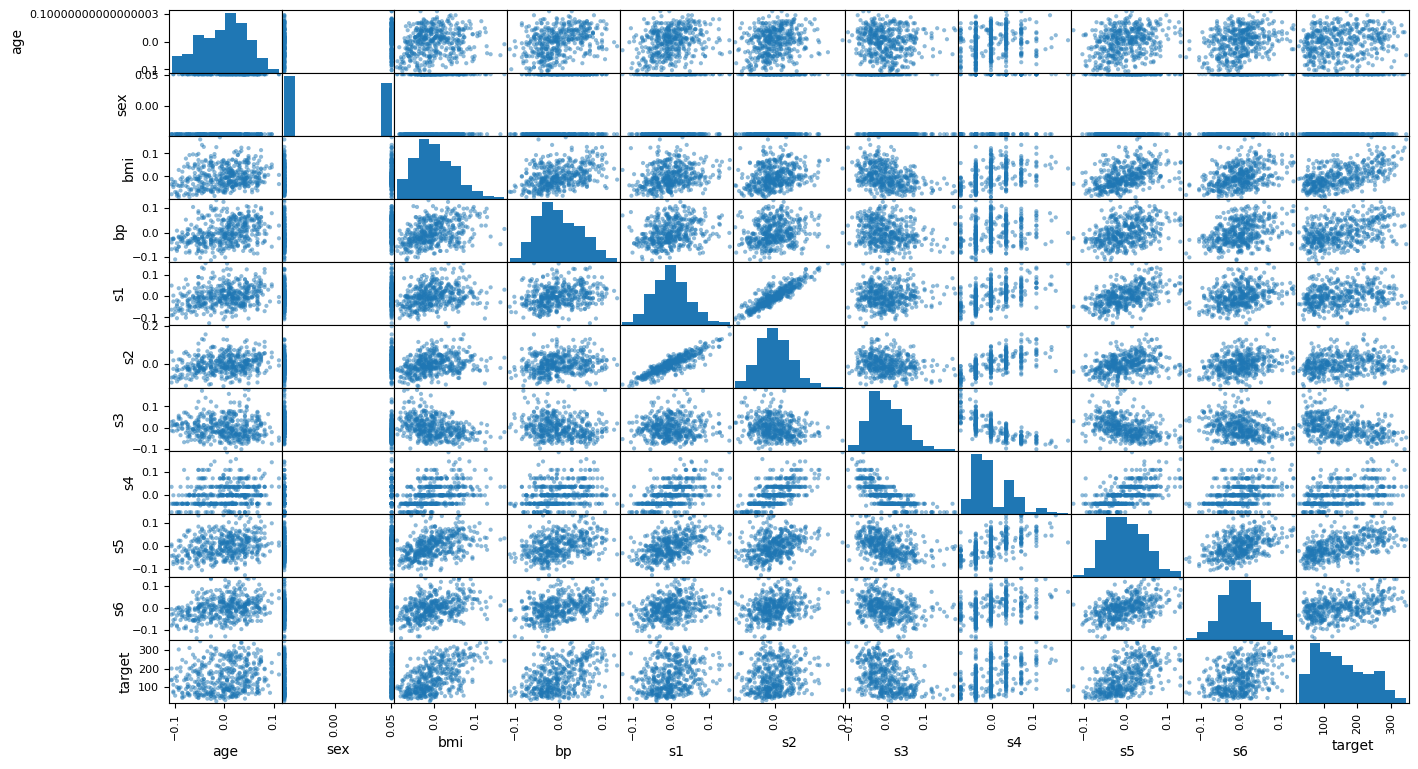

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(16, 9)); # Usamos el ; para no printear los subplots. Otra opción es asignar el método a una variable

> - Por ejemplo se puede observar que existe una correlación positiva evidente entre las variables s1 y s2

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

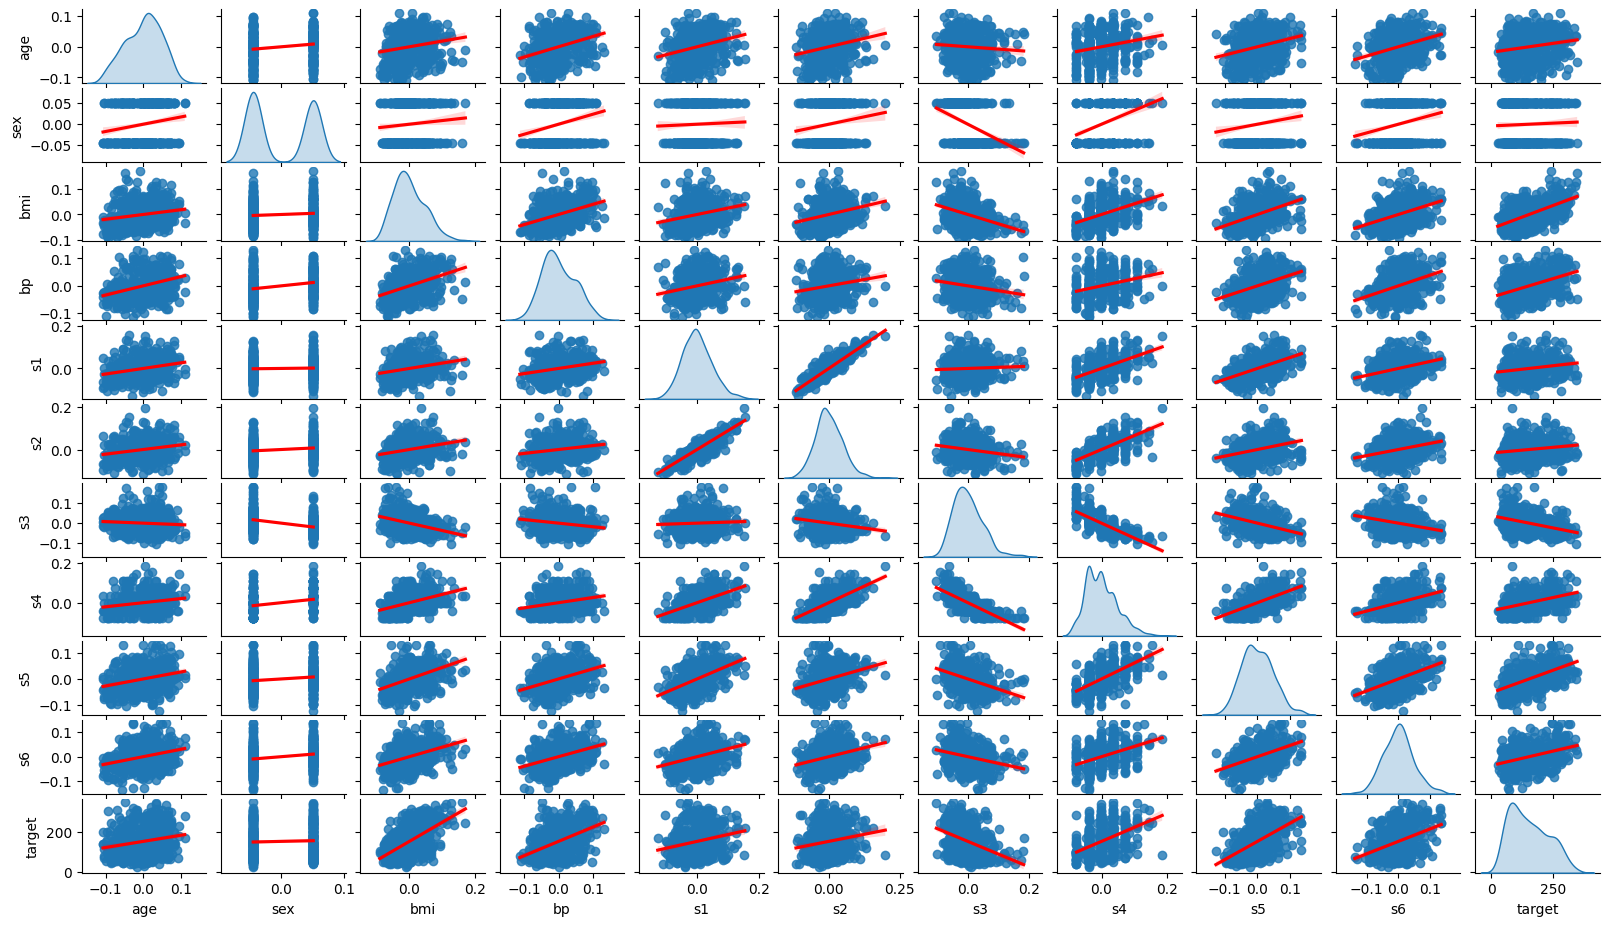

In [ ]:
import seaborn as sns # Vamos a realizar la misma visualización pero con seaborn y comprobar lo que tarda

g = sns.pairplot(df,
                 diag_kind ="kde", # Para plasmar lineas de regresión en la propia visualización
                 kind ="reg",
                 diag_kws = dict(shade=True),
                 plot_kws={"line_kws":{"color":"red"}}
                 )

g.fig.set_size_inches(16, 9)

### 3.2.2 Correlation matrix

> - Nos ofrece valores cuantitativos. Se trata de una matriz numérica que muestra el coeficiente de correlación entre nuestras variables.
> - Da como resultado la correlación normalizada de cada una de nuestras variables.
> - Recordar que **correlación no indica causalidad**

In [ ]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


> - Con esta info lo que hacemos es fgenerar un **heatmap** para comparar los valores de correlación a través de un código de colores divergentes

<Axes: >

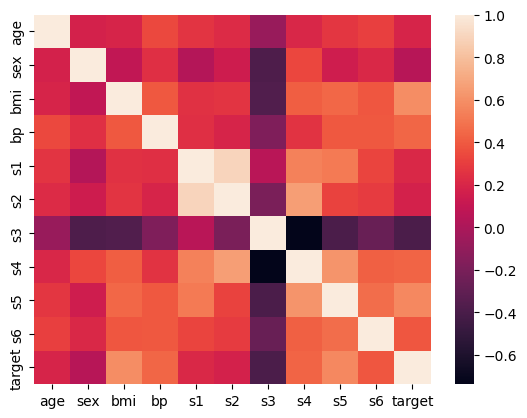

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()

sns.heatmap(corr)

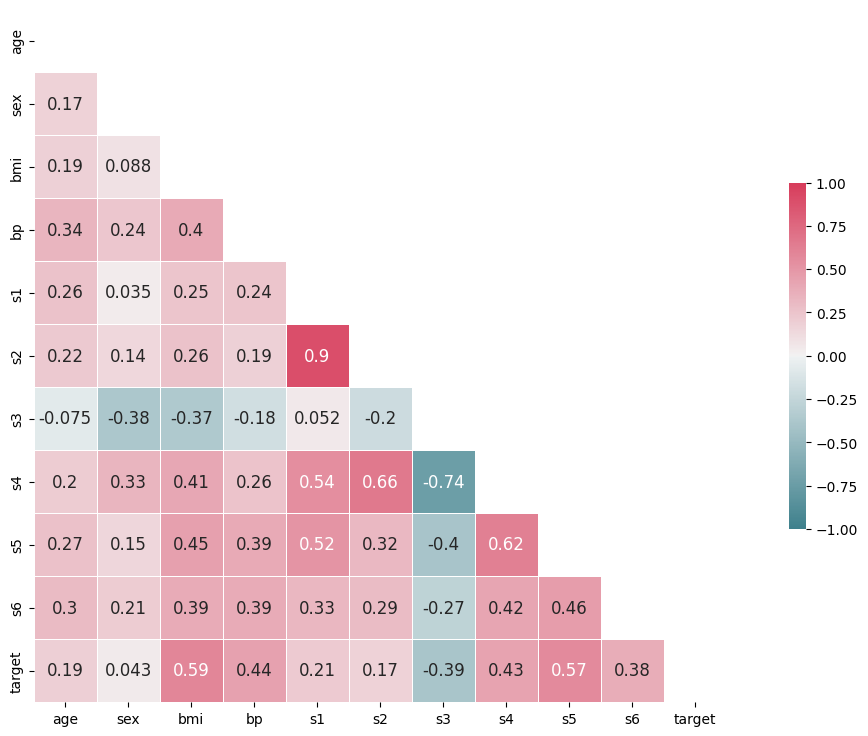

In [ ]:
# Vamos a mejorar la visualización

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # np.triu devuelve un array con los valores del triángulo superior de otro array de 2 dimensiones

fig = plt.figure(figsize=(16, 9))

cmap = sns.diverging_palette(210, 5, as_cmap=True) # Para indicar los colores de nuestro heatmap

sns.heatmap(corr, mask = mask, cmap = cmap,
            vmax = 1, vmin = -1, center = 0,
            annot = True, annot_kws={"size": 12},
            square = True, linewidths = .5,
            cbar_kws = {"shrink": .5} # Comprimir la barra de la leyenda para ver mejor a que color corresponde cada valor
            )

plt.show()

# 4.Model

> - Antes de alimentar a nuestro modelo con los datos debemos realizar un pequeño paso de manipulación de nuestros datos
> - `X_train` para los feature variable de entrenamiento
> - `X_test` para los feature variable de testeo del modelo
> - `y_train` para los target variable de entrenamiento
> - `y_test` para los target variable de testeo del modelo. Compara los resultados que ya sabemos con las predicciones del modelo
> - Para poder alimentar el modelo tenemos que realizar estas divisiones y tenemos que realizarlas de una forma manual. Pero muy poco manual porque sklearn tiene una fuinción especial para realizar esta división de manera muy sencilla



In [ ]:
from sklearn import datasets # importamos el dtaset de diabetes

X, y = datasets.load_diabetes(return_X_y = True)

In [ ]:
# Separamos los datos a nivel horizontal
from sklearn.model_selection import train_test_split

In [ ]:
# Definimos las variables de nuestros grupos de datos y usar la función anterior para separarlas

> - Un Random State es un parámetro numérico que establece la pseudoaleatoriedad (en programación la aleatoriedad no existe, si no que viene tmb programada) en programación. Con este parámetro fijamos la aleatoriedad para que siempre sea la misma.
> - Controlamos la cantidad de datos destinada al train_data y al test_data con el argumento `test_size` , indicando el % da datos que queremos que vaya al test_data (suele ser entre un 20% y un 30%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42, # Para que mi proyecto sea replicable. Que divida estos datos siempre de la misma manera. Para asignamos un seed o state. Se pone 42 porque es el "significado del universo"
                                                    test_size = 0.3)

In [ ]:
print(X_train.shape, X_test.shape)

(309, 10) (133, 10)


In [ ]:
print(y_train.shape, y_test.shape)

(309,) (133,)


## 4.1 Modelaje del algoritmo

> - Mismo proceso: **create, fit, predict** (cambiamos el transform por predict)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression() # Creamos la instancia

In [ ]:
linreg.fit(X_train, y_train) # Entrenamos nuestro modelo. Ajustamos los datos de entrenamiento a la instancia del LinearRegression

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test) # Nos devuelve los datos de nuestra target variable predichos en función de nuestros datos de testeto. Sería nuestra y_predict

y_pred

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

> - Ahora sí, con las predicciones de nuestro modelo nosotros empezamos un proceso de evaluación/interpretación de nuestros datos.

# 5.INterpret

## 5.1 Las predicciones

> - Es muy importante saber como nuestro modelo ha llegado a estas conclusiones ¿cuáles son las causas que afectan a nuestras predicciones?¿cómo aplicamos las predicciones?¿cómo generamos nuevas predicciones?¿cómo ha funcionado mi modelo y saber si ha funcionado bien?¿qué info puede ofrecerme este modelo a parte de estas predicciones?


### 5.1.1 ¿Cómo uso yo este modelo?¿Cómo puedo aplicarlo?

In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


> - Para alimentar al modelo ya entrenado tenemos que pasarle las mismas feature variables con las que ha entrenado, pero específicas para nuyestra predicción

In [ ]:
test = df.drop("target", axis = 1).sample(1)

test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
424,0.001751,0.05068,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024055,0.023775


In [ ]:
linreg.predict(test.values)

array([170.42734244])

### 5.1.2 ¿Cómo comprobamos si las predicciones tienen sentido? Comparación con el test data

In [ ]:
results = pd.DataFrame(np.c_[y_test, y_pred], columns = ["real", "pred"])

In [ ]:
results

,real,pred
0,219.0,138.469700
1,70.0,181.100523
2,202.0,125.344009
3,230.0,292.759773
4,111.0,123.883053
...,...,...
128,257.0,202.997787
129,137.0,92.101004
130,63.0,122.288768
131,93.0,80.808670


> - La primera métrica que tendremos en cuenta para comprobar nuestro modelo son los **residuales** (distancia de cada observación con nuestra línea de regresión)

In [ ]:
results["residual"] = results["real"] - results["pred"]

In [ ]:
results

,real,pred,residual
0,219.0,138.469700,80.530300
1,70.0,181.100523,-111.100523
2,202.0,125.344009,76.655991
3,230.0,292.759773,-62.759773
4,111.0,123.883053,-12.883053
...,...,...,...
128,257.0,202.997787,54.002213
129,137.0,92.101004,44.898996
130,63.0,122.288768,-59.288768
131,93.0,80.808670,12.191330


In [ ]:
results.describe()

,real,pred,residual
count,133.000000,133.000000,133.000000
mean,148.022556,144.282933,3.739623
std,73.750960,54.938512,53.188694
min,37.000000,46.629208,-152.991386
25%,90.000000,105.801145,-29.666564
50%,132.000000,146.960940,1.370792
75%,202.000000,185.252377,43.484511
max,310.000000,297.085786,126.410906


<Axes: >

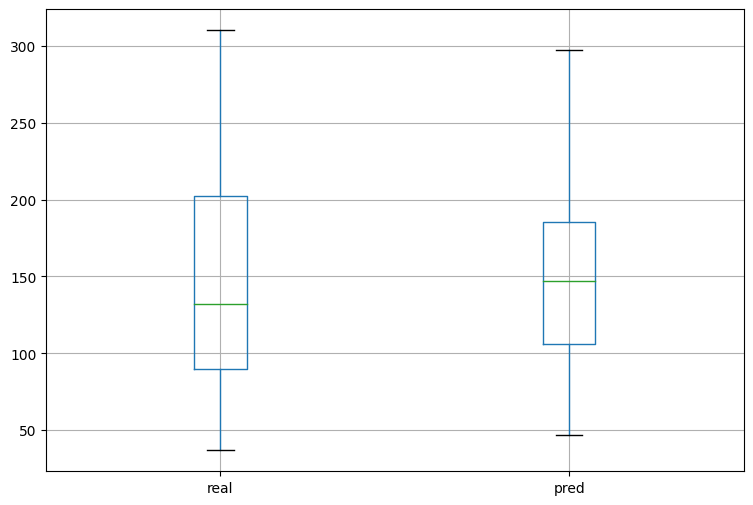

In [ ]:
results.drop("residual", axis = 1).boxplot(figsize= (9 , 6)) # Eliminamos residual porque se trata de un error, por lo que se trata de un dato que podría desconcertarnos

<Axes: >

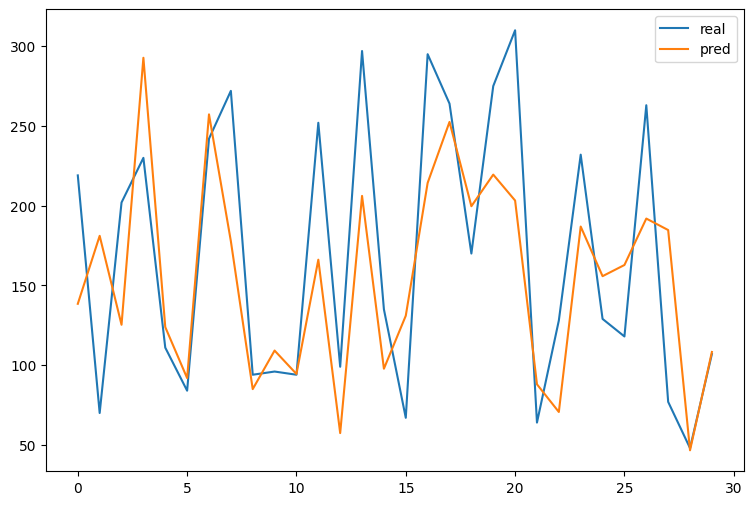

In [ ]:
results.drop("residual", axis = 1)[:30].plot(figsize= (9 , 6)) # Miramos entre samples para comparar como se comportan los valores reales contra los predichos

> - De esta forma no estamos interpretando de una forma muy correcta nuestros datos, ya que no trabajamos con medidas puramente analíticas (métricas para indicar cuales son los factores que más influyen en nuestro modelo)

## 5.2 Las métricas

### 5.2.1 Cocientes/ coefficients

In [ ]:
linreg.coef_

array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
       -901.95966819,  506.76324136,  121.15435079,  288.03526689,
        659.26895081,   41.37670105])

> - Los cocientes son los valor de la pendiente de la recta de regresión generada. Tenemos cada uno de los cocientes por cada una de las variables independientes.
> - En resumen, esto nos indica cuanto afecta cada una de nuestras variables independientes a nuestras predicciones, cuanto menor sea el coeficiente, menos afección sobre nuestra predicción tendrá

In [ ]:
pd.Series(linreg.coef_, index= df.drop("target", axis = 1).columns).sort_values(ascending=False) # Creamos un Series con el nombre de las variables que afectan a nuestras predicciones. Con .sort los ordenamos

s5     659.268951
bmi    546.299723
s2     506.763241
bp     388.398341
s4     288.035267
s3     121.154351
s6      41.376701
age     29.254013
sex   -261.706469
s1    -901.959668
dtype: float64

### 5.2.2 Residuales

In [ ]:
results["residual"]

0       80.530300
1     -111.100523
2       76.655991
3      -62.759773
4      -12.883053
          ...    
128     54.002213
129     44.898996
130    -59.288768
131     12.191330
132     -1.218705
Name: residual, Length: 133, dtype: float64

In [ ]:
results["residual"].mean()

3.739623246331621

> - El valor de la media no indica que el error sea 3, si no que nos está indicando que el error tanto positivo como negativo, es decir, la varianza de nuestros datos, está ajustada. Quiere decir que la línea de regresión esta ajustada a la varianza de nuestros datos


In [ ]:
results["residual"].var()

2829.0371550296622

### 5.2.3 Intercept

> - Indica la ordenada en el origen de la línea de regresión de nuestros datos.

In [ ]:
linreg.intercept_

151.00821291456543

### 5.2.4 Mean Squared Error (MSE)

> - Es el resultado de coger todas nuestras residuales y sumarlas, es decir, todo el error acumulado. Este valor se eleva al cuardrado y se divide por la cantidad de observaciones que tengamos. Es decir, es la media del error de nuestras residuales al cuadrado
> - Si el valor es elevado indica que nuestros datos están alejados de la línea de regresión obtenida.
> - No tiene sentido tener un MSE = 0

In [ ]:
results["residual"].apply(np.square).mean()

2821.750981001311

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred) # Se le pasa como argumentos dos arrays de una sola dimensión, y_test (datos originales) y y_pred (datos predichos)

2821.750981001311

### 5.2.5 Coeficiente de determinación r2 (r cuadrado)

> - Es posiblemente el coeficiente más importante.
> - Es una cifra entre 0 y 1 que indica si un modelo estadístico esta prediciendo o no correctramente. Es como el valor de los cocientes/coefficents pero normalizado entre 0 y 1.
> - Un valor de 1 quiere decir que nuestra variable dependiente (resultado) está 100% explicada por nuestras variables independientes. Un valor de 0 indica justamente lo contrario.
> - Hay que tener en cuenta que este valor también puede ser negativo. Lo que indica si es negativo es que, incluso en situaciones aleatrias, dicha variable lo explcia peor que si no la estuvieramos teniendo en cuenta.
> - Lo que buscamos es que nuestro r2 sea lo más cercano a 1

In [ ]:
linreg.score(X_test, y_test)

0.4772897164322617

# 6.Optimización

> - Iniciamos el proceso ciclico por el cual queremos mejorar nuestro modelo

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_df["target"] = diabetes.target

# Scrub y explore nos los saltamos porque nuestro dataset de diabetes ya sabemos que viene limpio

X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3) # Random state para que la división de los datos siempre se realice de la misma forma

linreg = LinearRegression()
linreg.fit(X_train, y_train)

linreg_y_pred = linreg.predict(X_test)

linreg_y_pred[:10] # Mostramos las 10 primeras predicciones para observar los primeros resultados

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992])

In [ ]:
linreg_r2 = linreg.score(X_test, y_test)
linreg_coef = linreg.coef_

In [ ]:
linreg_r2

0.4772897164322617

In [ ]:
linreg_coef

array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
       -901.95966819,  506.76324136,  121.15435079,  288.03526689,
        659.26895081,   41.37670105])

In [ ]:
from sklearn.metrics import mean_squared_error

linreg_mse = mean_squared_error(y_test, y_pred)

linreg_mse

2821.750981001311

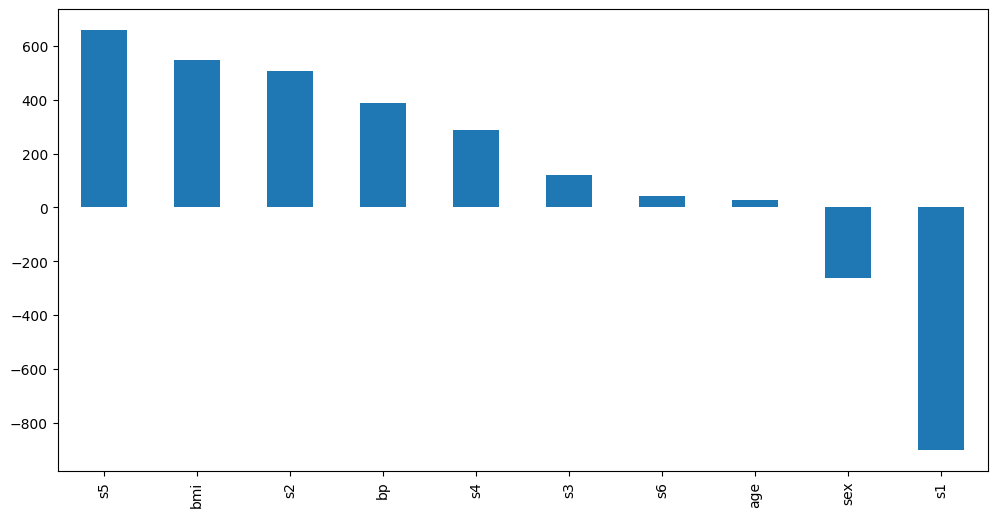

In [ ]:
# Función para ver visualmente los coeficientes de nuestro modelo. Vemos las variables que más influyen sobre nuestra target variable

pd.Series(linreg_coef, index = diabetes.feature_names).sort_values(ascending=False).plot.bar(figsize=(12, 6))

plt.show()

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## 6.1 Lasso Regression

> - Aplicamos la regularización que recibe el nombre de L1. Penalizamos los feature variables con valores más pequeños, es decir, los cocientes que menos incidencia tienen. Incluso puede llegar a eliminar alguna de estas feature variables, como por ejemplo podría ser el caso de la variable s1, que como hemos visto tiene una correlación muy negativa.
> - Esto implica que nuestros modelos sean más interpretables ya que eliminamos algunas feature variables, en conreto, las que menos incidencia tienen. Realmente, estas feature variables con correlaciones muy pequeñas, al eliminarlas, no estamos fastidiando el proceso de entrenamiento de nuestro modelo.
> - Eliminamos el ruido de las feature variable que realmente no nos dan información ni son necesarias para que nuestro modelo haga predicciones correctas.
> - Lasso funciona mejor cuando tenemos varios coeficientes altos y el resto son bastante bajos. Mantine las feature variables que son relevantes para nuestras predicciones.
> - **Utilizar estos métodos no tiene porque significar que mejoremos nuestras métricas, ya que dependemos mucho de la naturaleza de nuestros datos**. Puede ser que estos métodos de optimización no influyan mucho en nuestras predicciones ya que esto depende de si la naturaleza de nuestros datos lo permite
> - **Hiperparámetro** = opción de configuración de un modelo de Machine Learning
> - Al final con este método lo que hacemos es modificar el **feature importance**, que es el concepto que hace referncia a cuánto influye cada feature en nuestro modelo de Machine Learning

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Create, fit, predict

lasso = Lasso(alpha = 0.1) # Hiperparámetro alpha que indica la penalización/regularización.

lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
lasso_y_pred = lasso.predict(X_test)

### 6.1.1 Lasso evaluation

In [ ]:
lasso_r2 = lasso.score(X_test, y_test)
lasso_coef = lasso.coef_

lasso_r2, linreg_r2

(0.4859194402036221, 0.4772897164322617)

> - Observamos que con Lasso obtenemos una score (coef r2) mayor, lo cual indica que nuestro modelo es más preciso

In [ ]:
lasso_coef

array([   0.        , -173.27107577,  558.93812468,  339.35373951,
        -58.72068535,   -0.        , -274.11351588,    0.        ,
        372.83897776,   25.58680152])

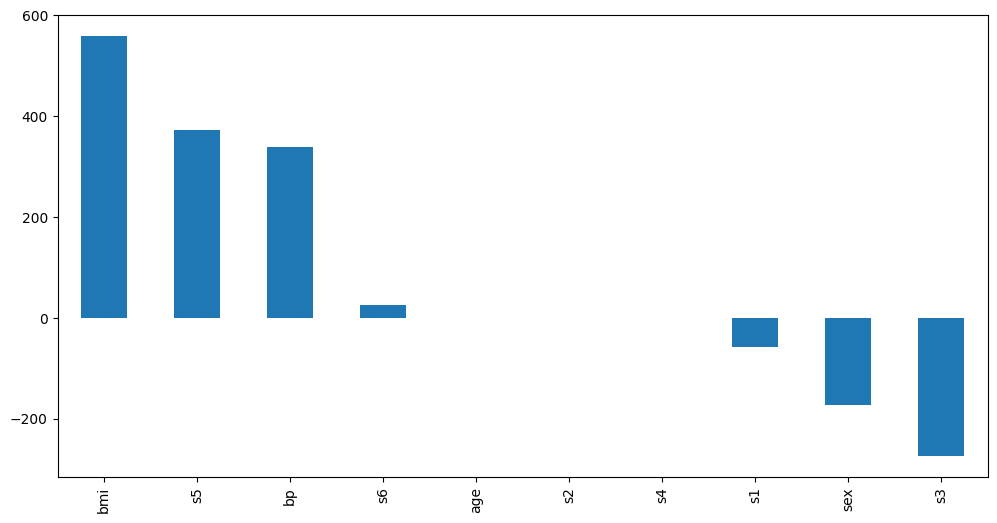

In [ ]:
pd.Series(lasso_coef, index = diabetes.feature_names).sort_values(ascending=False).plot.bar(figsize=(12, 6))

plt.show()

> - Vemos que ya hay algunas feature variables (parámetros) que ha eliminado y que por tanto ya no tienen ninguna incidecia sobre nuestras predicciones dentro de nuestro modelo de regresion. Vemos que ahora con Lasso, el bmi tiene una mayor incidendia.

In [ ]:
lasso_mse = mean_squared_error(y_test, lasso_y_pred)

lasso_mse, linreg_mse

(2775.165076183445, 2821.750981001311)

> - Se observa que tenemos un error más bajo con el Lasso que con el linreg, y solo se trata de nuestra primera prueba

## 6.2 Ridge Regression

> - En este caso lo que hacemos es aplciar la regularización L2.
> - Tambien reduce los feature importance de las variables que tienen menor importancia, pero como tienne un factor exponencial, nunca llega a cero y por lo tanto nunca las llega a eliminar del todo. Tendremos todas las variables en cuenta, en mayor o menor medida.
> - Ridge regression funciona mejor cuando tenemos más cantidad de feature variables y cuando estas están más equilibradas (cuando no hay ninguna que destaque por tener mucha o muy poca importancia)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)

ridge.fit(X_train, y_train)

ridge_y_pred = ridge.predict(X_test)

### 6.2.1 Ridge evaluation

In [ ]:
ridge_r2 = ridge.score(X_test, y_test)
ridge_coef = ridge.coef_

ridge_r2, linreg_r2

(0.48031838456367226, 0.4772897164322617)

> - Observamos como Ridge, en este caso y con este hiperparámetro, tmb ha funcionado mejor que Linear Regression

In [ ]:
ridge_coef

array([  39.6635292 , -213.84688049,  505.91429153,  341.71447431,
       -108.80630119,  -70.57580966, -211.90657957,  160.19354049,
        332.77354206,   77.68045166])

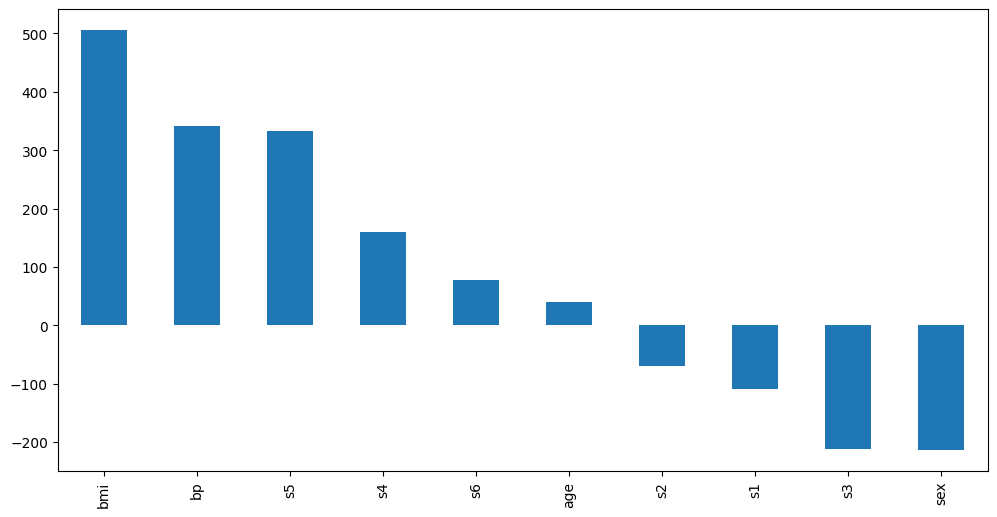

In [ ]:
pd.Series(ridge_coef, index = diabetes.feature_names).sort_values(ascending=False).plot.bar(figsize=(12, 6))

plt.show()

> - Vemos que ahora con Ridge, el bmi tiene una mayor incidendia y que por ejemplo, la importancia de bp tmb ha aumentado.

## 6.3 Comparación de métricas

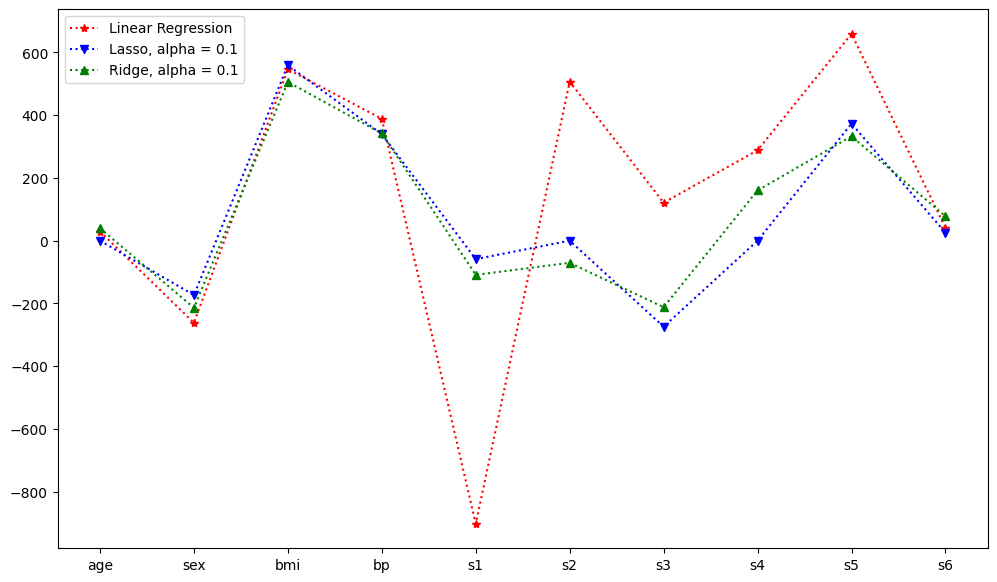

In [ ]:
plt.figure(figsize = (12, 7))

plt.plot(diabetes.feature_names, linreg_coef, linestyle= 'dotted', marker= '*', color= 'red', label='Linear Regression')
plt.plot(diabetes.feature_names, lasso_coef, linestyle='dotted', marker='v', color='blue', label=f'Lasso, alpha = {lasso.alpha}')
plt.plot(diabetes.feature_names, ridge_coef, linestyle= 'dotted', marker='^', color='green', label=f'Ridge, alpha = {ridge.alpha}')

plt.legend(loc="best")
plt.show()

# 7.Cross validation. Optimizando el valor del hiperparámetro

> - Lo que buscamos ahora es como encontrar el valor de los hiperparámetros (alpha) con el que obtenemos los menores errores. Buscamos el punto óptimo de las regularizaciones.


## 7.1 De forma visual (no es lo recomendable)

> - Podemos hacer un for loop para ello y hacer que nos devuelva todos los valores definiendo la precisión final o el número de veces que queremos que repita el bucle

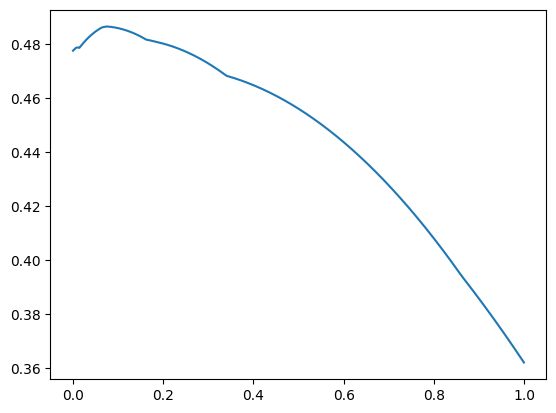

In [ ]:
alphas = np.arange(0.001, 1, 0.001)
r2_list = []

for i in alphas:
  model = Lasso(alpha=i)
  model.fit(X_train, y_train)

  r2_list.append(model.score(X_test, y_test))

plt.plot(alphas, r2_list);

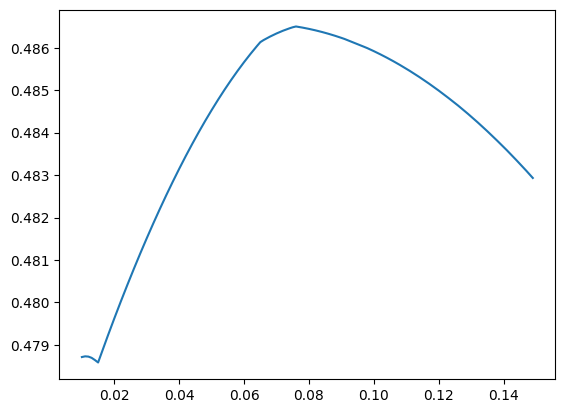

In [ ]:
alphas = np.arange(0.01, 0.15, 0.001) # Repetimos, pero quedanonos con los valores de alpha que hemos visto que nos ofrecen un mejor resultado
r2_list = []

for i in alphas:
  model = Lasso(alpha=i)
  model.fit(X_train, y_train)

  r2_list.append(model.score(X_test, y_test))

plt.plot(alphas, r2_list);

> - Hacemos la misma prueba con Ridge regression

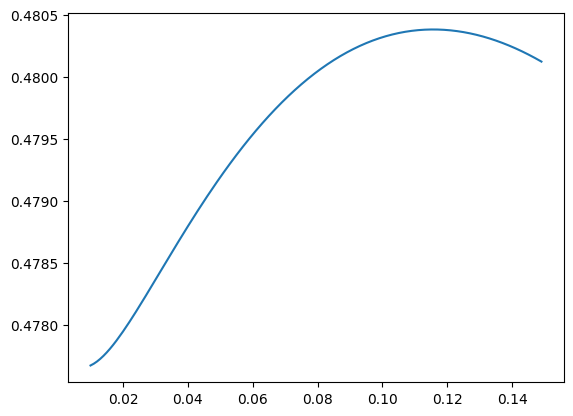

In [ ]:
alphas = np.arange(0.01, 0.15, 0.001) # Repetimos, pero quedanonos con los valores de alpha que hemos visto que nos ofrecen un mejor resultado
r2_list = []

for i in alphas:
  model = Ridge(alpha=i)
  model.fit(X_train, y_train)

  r2_list.append(model.score(X_test, y_test))

plt.plot(alphas, r2_list);

## 7.2 Cross validation

> - Puede ser una herramienta que puede aplicarse a cualquier modelo.
> - También puede ser una variante del modelo yta preparada para encontrar eel punto óptimo de nuestro modelo. Constriumos los modelos de nuevo pero ahora con su versión de cross validation

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [ ]:
lasso_cv = LassoCV(n_alphas = 1000, random_state = 42).fit(X_train, y_train) # Indicamos como parámetro el número de alphas que debe probar.
                                                                             # Random state para asegurar que el valor de alphas que elija siempre sean los mismos
                                                                             # usamos el .fit() como método para crear nuestro modelo

In [ ]:
lasso_cv.alphas_ # para ver que valores de alpha ha usado

array([2.27517514e+00, 2.25949732e+00, 2.24392753e+00, 2.22846503e+00,
       2.21310908e+00, 2.19785895e+00, 2.18271390e+00, 2.16767322e+00,
       2.15273618e+00, 2.13790206e+00, 2.12317017e+00, 2.10853979e+00,
       2.09401022e+00, 2.07958078e+00, 2.06525076e+00, 2.05101949e+00,
       2.03688629e+00, 2.02285048e+00, 2.00891138e+00, 1.99506834e+00,
       1.98132068e+00, 1.96766776e+00, 1.95410892e+00, 1.94064351e+00,
       1.92727089e+00, 1.91399041e+00, 1.90080145e+00, 1.88770337e+00,
       1.87469555e+00, 1.86177736e+00, 1.84894819e+00, 1.83620743e+00,
       1.82355446e+00, 1.81098867e+00, 1.79850948e+00, 1.78611628e+00,
       1.77380847e+00, 1.76158548e+00, 1.74944671e+00, 1.73739159e+00,
       1.72541954e+00, 1.71352999e+00, 1.70172237e+00, 1.68999611e+00,
       1.67835065e+00, 1.66678544e+00, 1.65529992e+00, 1.64389355e+00,
       1.63256578e+00, 1.62131606e+00, 1.61014387e+00, 1.59904866e+00,
       1.58802991e+00, 1.57708708e+00, 1.56621966e+00, 1.55542712e+00,
      

In [ ]:
lasso_cv.alpha_ # para ver cual es el parámetro de alpha que mejor resultado nos ofrece

0.005399955841176059

In [ ]:
lasso_cv.score(X_test, y_test) # para poder visualizar la mayor puntuación que se obtiene con el alpha anterior

0.4782683944033733

In [ ]:
lasso_cv.coef_

array([  29.15934895, -255.95172648,  551.85312608,  383.84535054,
       -628.76682203,  296.06378439,   -0.        ,  244.84346367,
        555.63184841,   43.0311808 ])

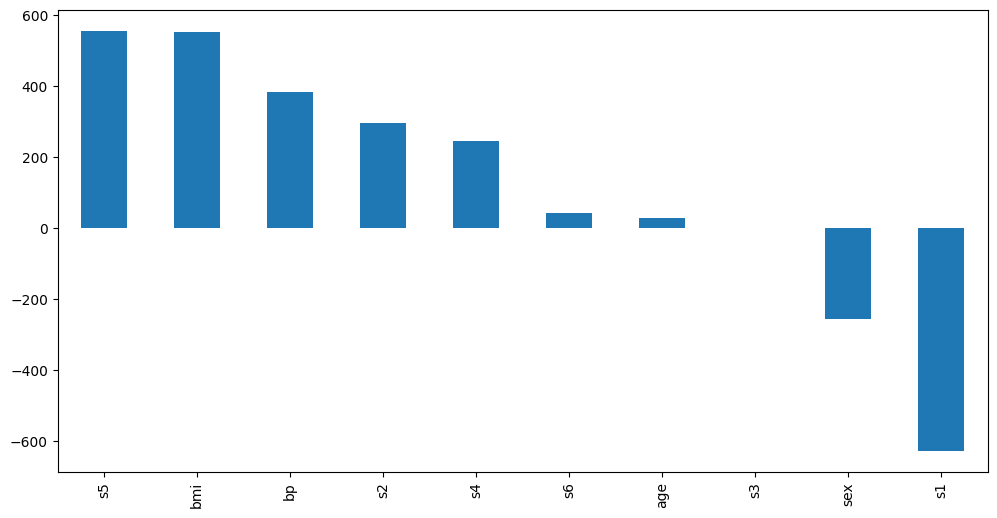

In [ ]:
pd.Series(lasso_cv.coef_, index = diabetes.feature_names).sort_values(ascending=False).plot.bar(figsize=(12, 6))

plt.show()

In [ ]:
lasso_cv_y_pred = lasso_cv.predict(X_test)

In [ ]:
lasso_cv_mse = mean_squared_error(y_test, lasso_cv_y_pred)

lasso_cv_mse, linreg_mse

(2816.4677761134726, 2821.750981001311)

In [138]:
ridge_cv = RidgeCV(alphas = [0.1, 1.0, 10.0], cv = 5).fit(X_train, y_train) #Revisar bien esta función

In [139]:
ridge_cv.alpha_

0.1

In [140]:
ridge_cv_y_pred = ridge_cv.predict(X_test)

In [141]:
ridge_cv_mse = mean_squared_error(y_test, ridge_cv_y_pred)

ridge_cv_mse, linreg_mse

(2805.401298319341, 2821.750981001311)